In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import seaborn as sns
from scipy.stats import sem # For standard error calculation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore


## Data Preprocessing

In [19]:

full_data = pd.read_csv('./data/listings.csv')

# Selecting specific columns from the dataset
data1 = full_data[['host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 
                   'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 
                   'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type', 'accommodates', 
                   'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights', 'availability_365', 
                   'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                   'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                   'review_scores_value', 'instant_bookable', 'reviews_per_month']]



/var/folders/wl/0s5ng1zs3pbd066k6nncr6900000gn/T/ipykernel_34637/3649777769.py:1: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  full_data = pd.read_csv('./data/listings.csv')


In [10]:
selected_columns = [
    'host_since', 'host_response_time', 'host_response_rate',
    'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
    'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed'
]
data1 = full_data[selected_columns]

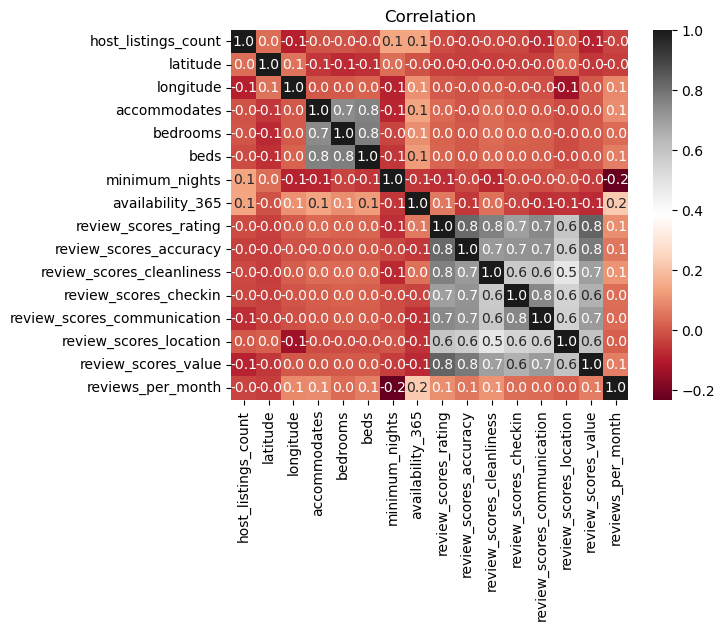

In [20]:
# Correlation plot for data1
corr = data1.corr()
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdGy")
plt.title("Correlation")
plt.show()

In [21]:
# Checking for missing values
col_missing = data1.isna().sum()
print(col_missing)

host_since                         66
host_response_time              13210
host_response_rate              13210
host_acceptance_rate            11732
host_is_superhost                  66
host_listings_count                66
host_has_profile_pic               66
host_identity_verified             66
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
room_type                           0
accommodates                        0
bathrooms_text                     81
bedrooms                         3654
beds                              901
price                               0
minimum_nights                      0
availability_365                    0
review_scores_rating             7949
review_scores_accuracy           8428
review_scores_cleanliness        8418
review_scores_checkin            8432
review_scores_communication      8423
review_scores_location           8435
review_scores_value              8435
instant_book

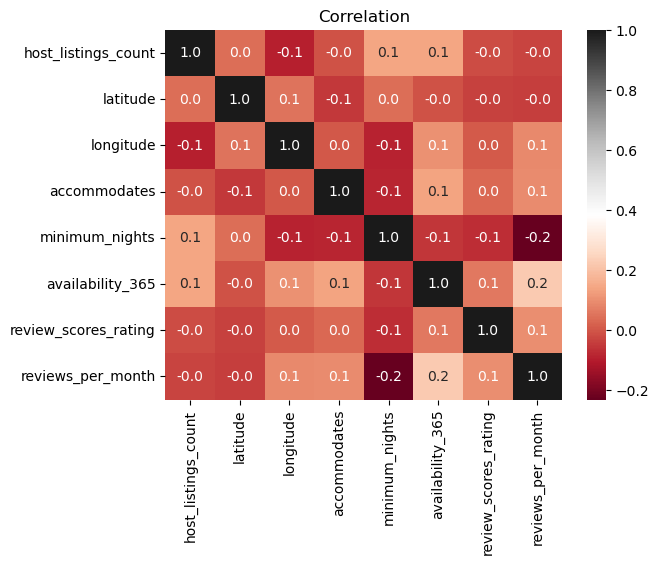

/var/folders/wl/0s5ng1zs3pbd066k6nncr6900000gn/T/ipykernel_34637/3668204011.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['price'] = data2['price'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/wl/0s5ng1zs3pbd066k6nncr6900000gn/T/ipykernel_34637/3668204011.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['host_is_superhost'] = np.where(data2['host_is_superhost'] == 't', 1, 0)
/var/folders/wl/0s5ng1zs3pbd066k6nncr6900000gn/T/ipykernel_34637/3668204011.py:16: SettingWithCo

In [23]:
# Removing correlated variables for data2
data2 = full_data[['host_since', 'host_response_time', 'host_is_superhost', 'host_listings_count', 
                   'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude', 
                   'longitude', 'room_type', 'bathrooms_text', 'accommodates', 'price', 'minimum_nights', 
                   'availability_365', 'review_scores_rating', 'instant_bookable', 'reviews_per_month']]

# Correlation plot for data2
corr = data2.corr()
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdGy")
plt.title("Correlation")
plt.show()

# Data cleaning and feature engineering
data2['price'] = data2['price'].replace('[\$,]', '', regex=True).astype(float)
data2['host_is_superhost'] = np.where(data2['host_is_superhost'] == 't', 1, 0)
data2['host_has_profile_pic'] = np.where(data2['host_has_profile_pic'] == 't', 1, 0)
data2['host_identity_verified'] = np.where(data2['host_identity_verified'] == 't', 1, 0)
data2['instant_bookable'] = np.where(data2['instant_bookable'] == 't', 1, 0)


In [27]:
# Ensure 'price' is a float before log transform
data2['price'] = pd.to_numeric(data2['price'], errors='coerce')

# Delete rows with price of zero or NaN values in 'price' after conversion
data2 = data2[data2['price'] > 0]

# Log transform 'price'
data2['price_log'] = np.log(data2['price'])

# Check for missing values again
col_missing = data2.isna().sum()
print(col_missing)


id                                            0.0
listing_url                                   0.0
scrape_id                                     0.0
last_scraped                                  0.0
name                                          0.0
                                             ... 
neighbourhood_group_cleansed_Brooklyn         0.0
neighbourhood_group_cleansed_Manhattan        0.0
neighbourhood_group_cleansed_Queens           0.0
neighbourhood_group_cleansed_Staten Island    0.0
price_log                                     0.0
Length: 82, dtype: float64


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime

# Load the data
data2 = pd.read_csv('./data/listings.csv')

# Cleaning the 'bathrooms_text' column
data2['bathrooms_text'] = data2['bathrooms_text'].str.replace('half|Half', '0.5', regex=True)
data2['bathrooms_text'] = data2['bathrooms_text'].str.extract('(\d*\.?\d+)').astype(float)

# Encoding 'host_response_time' as ordinal
mapping = {'a few days or more': 1, 'within a day': 2, 'within a few hours': 3, 'within an hour': 4}
data2['host_response_time'] = data2['host_response_time'].map(mapping).astype(float)

# One-hot encoding for 'room_type' and 'neighbourhood_group_cleansed'
ohe_room_type = OneHotEncoder(sparse=False)
data2_room_type_encoded = ohe_room_type.fit_transform(data2[['room_type']])
room_type_columns = ohe_room_type.get_feature_names_out(['room_type'])

ohe_neighborhood = OneHotEncoder(sparse=False)
data2_neighborhood_encoded = ohe_neighborhood.fit_transform(data2[['neighbourhood_group_cleansed']])
neighborhood_columns = ohe_neighborhood.get_feature_names_out(['neighbourhood_group_cleansed'])

# Append one-hot encoded columns back to data2
data2 = pd.concat([data2, pd.DataFrame(data2_room_type_encoded, columns=room_type_columns),
                   pd.DataFrame(data2_neighborhood_encoded, columns=neighborhood_columns)], axis=1)

# Drop the original columns for 'room_type' and 'neighbourhood_group_cleansed'
data2.drop(['room_type', 'neighbourhood_group_cleansed'], axis=1, inplace=True)

# Replace NAs with 0
data2.fillna(0, inplace=True)

# Convert 'host_since' from date to number of days
data2['host_since'] = (pd.to_datetime('today') - pd.to_datetime(data2['host_since'])).dt.days

# Drop rows with NA values
data2.dropna(inplace=True)



# Log transform 'price'
# Ensure 'price' is a float before log transform
data2['price'] = pd.to_numeric(data2['price'], errors='coerce')

# Delete rows with price of zero or NaN values in 'price' after conversion
data2 = data2[data2['price'] > 0]

# Log transform 'price'
data2['price_log'] = np.log(data2['price'])

# Check for missing values again
col_missing = data2.isna().sum()
print(col_missing)




/var/folders/wl/0s5ng1zs3pbd066k6nncr6900000gn/T/ipykernel_34637/810838715.py:7: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv('./data/listings.csv')


id                                            0.0
listing_url                                   0.0
scrape_id                                     0.0
last_scraped                                  0.0
name                                          0.0
                                             ... 
neighbourhood_group_cleansed_Brooklyn         0.0
neighbourhood_group_cleansed_Manhattan        0.0
neighbourhood_group_cleansed_Queens           0.0
neighbourhood_group_cleansed_Staten Island    0.0
price_log                                     0.0
Length: 82, dtype: float64


## EDA

In [37]:
data_clean

,host_since,host_response_time,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,bathrooms_text,accommodates,minimum_nights,availability_365,...,room_typeEntire home/apt,room_typeHotel room,room_typePrivate room,room_typeShared room,neighbourhood_group_cleansedBronx,neighbourhood_group_cleansedBrooklyn,neighbourhood_group_cleansedManhattan,neighbourhood_group_cleansedQueens,neighbourhood_group_cleansedStaten Island,price_log
0,5349,1,0,6,1,1,1.0,1,30,308,...,1,0,0,0,0,0,1,0,0,5.416100
1,5202,4,0,1,1,1,0.0,2,30,365,...,0,0,1,0,0,1,0,0,0,4.094345
2,5202,4,0,1,1,1,1.5,4,21,250,...,1,0,0,0,0,1,0,0,0,5.616771
3,5174,2,0,1,1,0,1.0,2,2,172,...,0,0,1,0,0,0,1,0,0,4.219508
4,5200,0,0,1,1,1,1.0,1,2,0,...,0,0,1,0,0,0,1,0,0,4.317488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37307,2927,4,0,3,1,1,1.0,6,3,61,...,1,0,0,0,0,0,0,0,1,4.969813
37308,700,4,1,1,1,1,3.0,8,30,113,...,1,0,0,0,0,1,0,0,0,6.429719
37309,678,4,0,13,1,1,1.0,2,30,118,...,0,0,1,0,0,0,1,0,0,4.532599
37310,2329,4,0,3322,1,1,1.0,2,31,335,...,1,0,0,0,0,0,1,0,0,6.135565


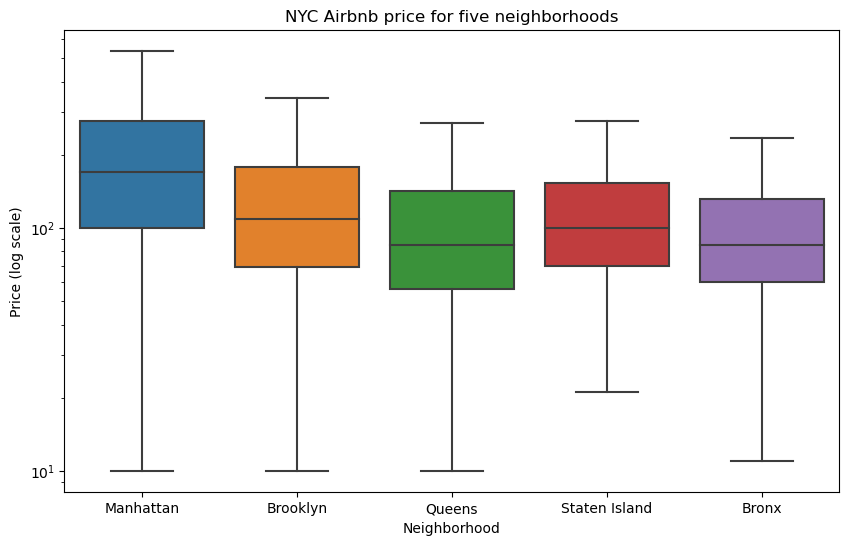

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_EDA, x='neighbourhood_group_cleansed', y='price', showfliers=False)
plt.yscale('log')
plt.title('NYC Airbnb price for five neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Price (log scale)')
plt.show()

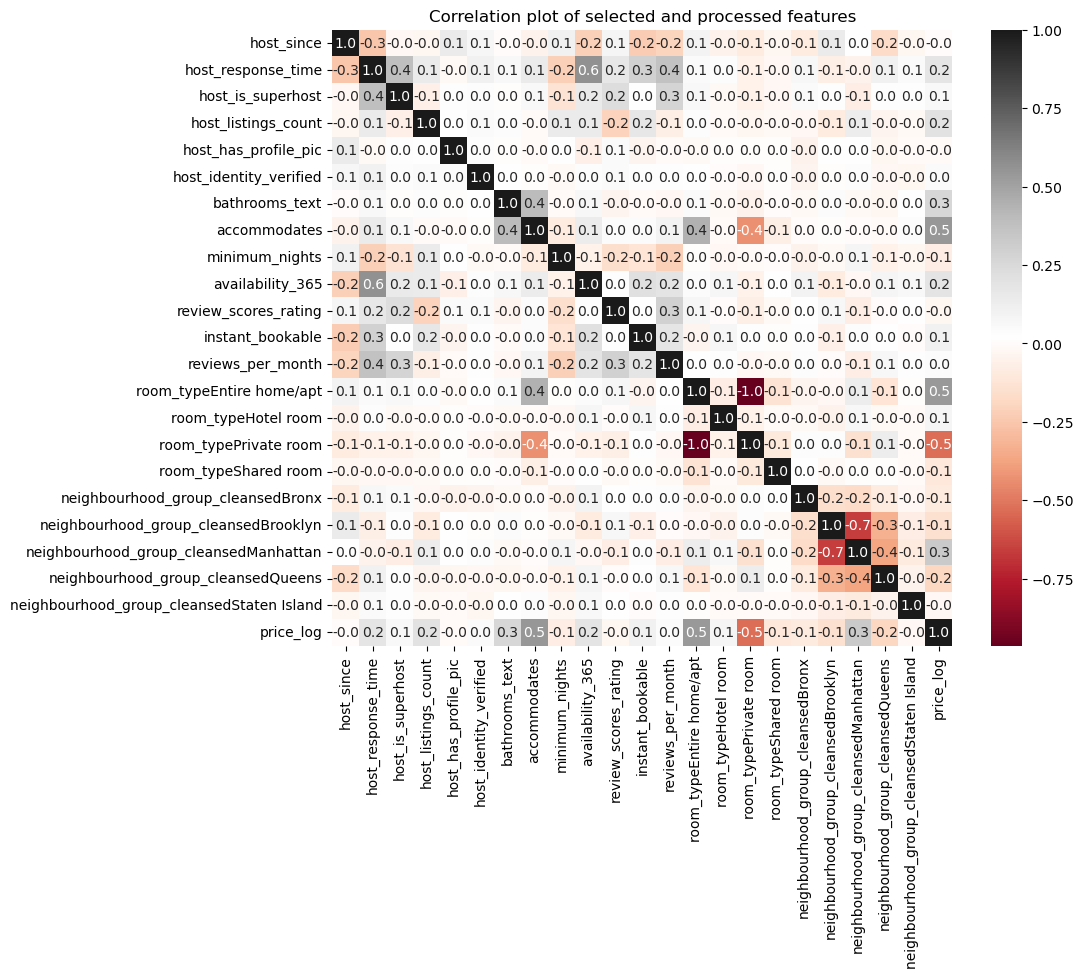

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_clean.corr(), annot=True, fmt=".1f", cmap="RdGy")
plt.title("Correlation plot of selected and processed features")
plt.show()

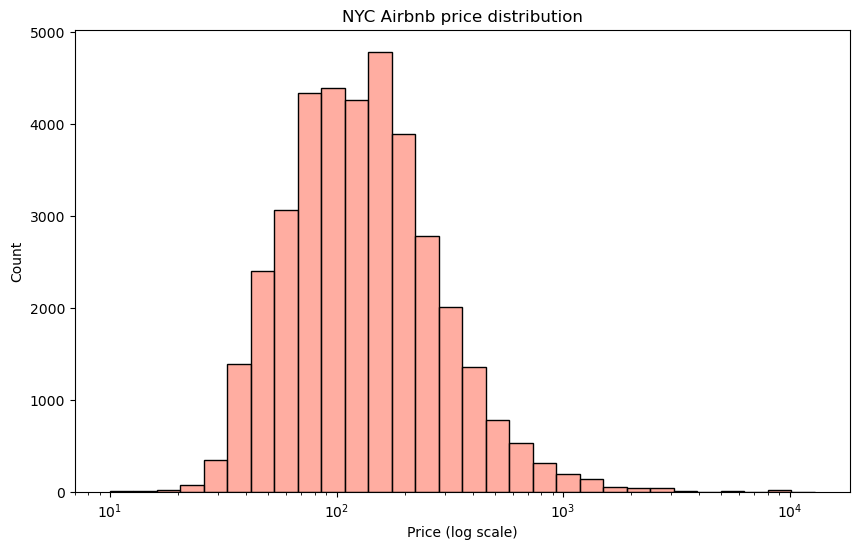

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data_EDA['price'], bins=30, color='#FF9282', log_scale=True)
plt.title('NYC Airbnb price distribution')
plt.xlabel('Price (log scale)')
plt.ylabel('Count')
plt.show()


## Models

      Model      RMSE  R_squared
0  Baseline  1.000230  -0.000068
1      Full  0.661065   0.563164
2     Lasso  0.660746   0.563586
3     Ridge  0.660783   0.563537
Lasso Coefficients Importance:
 room_typeEntire home/apt                 0.336240
accommodates                             0.327704
neighbourhood_group_cleansedManhattan    0.229677
host_listings_count                      0.128687
bathrooms_text                           0.098571
dtype: float64
Ridge Coefficients Importance:
 accommodates                             0.326922
neighbourhood_group_cleansedManhattan    0.175448
room_typeEntire home/apt                 0.172336
room_typePrivate room                    0.163492
host_listings_count                      0.128739
dtype: float64


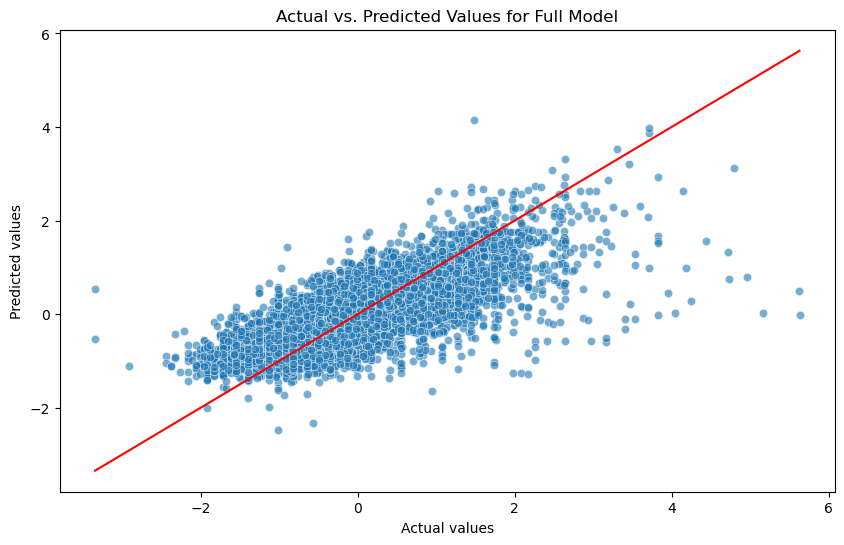

In [44]:


# Load the data
data_clean = pd.read_csv('./data/listings_clean.csv')

# Scaling the data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_clean), columns=data_clean.columns)

# Train test split
train_data, test_data = train_test_split(data_scaled, test_size=0.2, random_state=0)

# Linear Regression (Full model)
full_model = LinearRegression().fit(train_data.drop('price_log', axis=1), train_data['price_log'])

# Prediction and Evaluation (Full model)
y_pred_full = full_model.predict(test_data.drop('price_log', axis=1))
full_rmse = np.sqrt(mean_squared_error(test_data['price_log'], y_pred_full))
full_r_squared = r2_score(test_data['price_log'], y_pred_full)

# Lasso Regression
lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5).fit(train_data.drop('price_log', axis=1), train_data['price_log'])

# Ridge Regression
ridge_cv = RidgeCV(alphas=np.logspace(-4, 4, 100), cv=5).fit(train_data.drop('price_log', axis=1), train_data['price_log'])

# Predictions and Evaluations for Lasso and Ridge
y_pred_lasso = lasso_cv.predict(test_data.drop('price_log', axis=1))
lasso_rmse = np.sqrt(mean_squared_error(test_data['price_log'], y_pred_lasso))
lasso_r_squared = r2_score(test_data['price_log'], y_pred_lasso)

y_pred_ridge = ridge_cv.predict(test_data.drop('price_log', axis=1))
ridge_rmse = np.sqrt(mean_squared_error(test_data['price_log'], y_pred_ridge))
ridge_r_squared = r2_score(test_data['price_log'], y_pred_ridge)

# Baseline model
mean_target = train_data['price_log'].mean()
baseline_rmse = np.sqrt(mean_squared_error(test_data['price_log'], np.full(test_data.shape[0], mean_target)))
baseline_rsq = r2_score(test_data['price_log'], np.full(test_data.shape[0], mean_target))

# Results
results = pd.DataFrame({
    'Model': ['Baseline', 'Full', 'Lasso', 'Ridge'],
    'RMSE': [baseline_rmse, full_rmse, lasso_rmse, ridge_rmse],
    'R_squared': [baseline_rsq, full_r_squared, lasso_r_squared, ridge_r_squared]
})

print(results)

# Coefficients importance for Lasso and Ridge
lasso_coef = pd.Series(lasso_cv.coef_, index=train_data.drop('price_log', axis=1).columns)
ridge_coef = pd.Series(ridge_cv.coef_, index=train_data.drop('price_log', axis=1).columns)

lasso_importance = lasso_coef.abs().sort_values(ascending=False)
ridge_importance = ridge_coef.abs().sort_values(ascending=False)

print("Lasso Coefficients Importance:\n", lasso_importance.head())
print("Ridge Coefficients Importance:\n", ridge_importance.head())



# Predicted vs Actual values plot for the Full model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_data['price_log'], y=y_pred_full, alpha=0.6)
sns.lineplot(x=test_data['price_log'], y=test_data['price_log'], color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Values for Full Model')
plt.show()


In [67]:
! pip install statsmodels


ERROR: Could not find a version that satisfies the requirement lme4 (from versions: none)
ERROR: No matching distribution found for lme4


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load data
data_EDA = pd.read_csv('./data/listings_EDA.csv')

# Data processing
type_entire = data_EDA['room_typeEntire home/apt']
price_log = data_EDA['price_log']
neighborhood_name = data_EDA['neighbourhood_group_cleansed'].values

# Encode neighborhood names to numbers
le = LabelEncoder()
neighborhood = le.fit_transform(neighborhood_name)

# Complete pooling regression

model_pooled = ols('price_log ~ Q("room_typeEntire home/apt")', data=data_EDA).fit()
data_EDA['neighborhood_encoded'] = neighborhood

model_M1 = smf.mixedlm('price_log ~ Q("room_typeEntire home/apt")', data=data_EDA, groups='neighborhood_encoded').fit()

print(model_M1.summary())

# Extract coefficients for varying intercept regression
a_hat_M1_fixed = model_M1.params['Intercept']
b_hat_M1_fixed = model_M1.params['Q("room_typeEntire home/apt")']

# Varying intercept & slopes regression
formula_M2 = 'price_log ~ Q("room_typeEntire home/apt") * neighborhood_encoded'
model_M2 = smf.mixedlm(formula_M2, data=data_EDA, groups=data_EDA['neighborhood_encoded']).fit()
print(model_M2.summary())
# Extract coefficients for varying intercept & slopes regression
# Note: Direct extraction of named coefficients should match the output from model_M2.summary()
a_hat_M2_intercept = model_M2.params['Intercept']
# For room type, ensure you use the exact name as appears in the summary output
b_hat_M2_room_type = model_M2.params['Q("room_typeEntire home/apt")']

# Plotting
n = len(price_log)
# Assuming 'type_entire' and 'price_log' are correctly defined Series in 'data_EDA'
x_jitter = data_EDA['room_typeEntire home/apt'] + np.random.uniform(-.05, .05, size=n)  # Adjust 'type_entire' access if necessary
display8 = np.array([0, 1, 2, 3, 4])  # Adjust based on actual neighborhood indices after encoding
y_range = data_EDA['price_log'][data_EDA['neighborhood_encoded'].isin(display8)].agg(['min', 'max'])

plt.figure(figsize=(12, 2.5))

for j in display8:
    # Ensure you're filtering 'data_EDA' DataFrame directly
    plt.subplot(1, 5, j+1)
    plt.scatter(x_jitter[data_EDA['neighborhood_encoded'] == j], data_EDA['price_log'][data_EDA['neighborhood_encoded'] == j], s=20)
    plt.xlim([-.05, 1.05])
    plt.ylim(y_range.values)
    plt.xlabel("entire home/apt")
    plt.ylabel("log price")
    plt.title(f"Neighborhood {j}")  # Adjust title to use actual neighborhood names if available
    # Include model fitting lines here as per your analysis

plt.tight_layout()
plt.savefig('./plots/multilevel.png', dpi=350)
plt.close()

                 Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      price_log  
No. Observations:      37312        Method:                  REML       
No. Groups:            5            Scale:                   0.3792     
Min. group size:       401          Log-Likelihood:          -34874.8498
Max. group size:       15768        Converged:               Yes        
Mean group size:       7462.4                                           
------------------------------------------------------------------------
                              Coef. Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                     4.310    0.096  45.129 0.000  4.123  4.497
Q("room_typeEntire home/apt") 0.775    0.007 119.045 0.000  0.763  0.788
neighborhood_encoded Var      0.045    0.053                            



/Users/janceyliu/opt/anaconda3/envs/2060/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/janceyliu/opt/anaconda3/envs/2060/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/janceyliu/opt/anaconda3/envs/2060/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/janceyliu/opt/anaconda3/envs/2060/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/janceyliu/opt/anaconda3/envs/2060/lib/python3.10/site-packages/statsmodels/base/model.py:607: 

                            Mixed Linear Model Regression Results
Model:                        MixedLM             Dependent Variable:             price_log  
No. Observations:             37312               Method:                         REML       
No. Groups:                   5                   Scale:                          0.3789     
Min. group size:              401                 Log-Likelihood:                 -34861.6287
Max. group size:              15768               Converged:                      No         
Mean group size:              7462.4                                                         
---------------------------------------------------------------------------------------------
                                                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------------------
Intercept                                           4.267    0.229 18.595 0.000  3.817  